# Observations and Insights 


Observations and Insights here: Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data.

Capomulin and Ramicane have slightly more mice in each of its trials than the other regimens and placebo. Capomulin and Ramicane, however, have a better overall optimistic success. The average tumor volume for Ramicane was 40.216745 and Capomulin was 40.675741.

Over time both Capomulin and Ramicane brought the tumor volume down from about 45 to an average around 30 over a period of around 45 days, while the other regimens and placebo increased tumor volume over the period of time.

There appears to be a strong correlation concerning the Capomulin regimen with mouse weight and average tumor volume. The correlation being 0.84, very close to 1. It would seem the heavier the mouse, the higher the tumor volume.

I would say both Capomulin and Ramicane seem to be promising drug treatments for SCC tumor growth. It may need more analyzing and time.

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata,study_results,on='Mouse ID')

# Display the data table for preview
combined.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [165]:
# Checking the number of mice.
mice_number = len(mouse_metadata['Mouse ID'].unique())
mice_number


249

In [166]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
study_results[study_results.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.0,0


In [167]:
# Optional: Get all the data for the duplicate mouse ID. 
combined[combined.duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [168]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean = pd.DataFrame(combined.drop_duplicates())
combined_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [169]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(combined_clean["Mouse ID"].unique())
mouse_count

249

## Summary Statistics

In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean= combined_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median= combined_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

variance= combined_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stdv= combined_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

sem= combined_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [171]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation  = combined_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

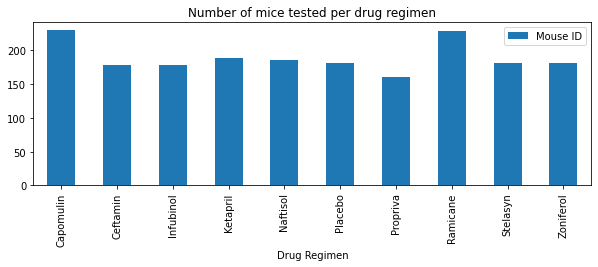

<Figure size 432x288 with 0 Axes>

In [172]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
combined_group = combined_clean[["Drug Regimen", "Mouse ID"]].groupby("Drug Regimen")
number_mouse = pd.DataFrame(combined_group["Mouse ID"].count())

# Use DataFrame.plot() in order to create a bar chart of the data
number_mouse.plot(kind="bar", figsize=(10,3))

#Set a title for the chart
plt.title("Number of mice tested per drug regimen")

#Display chart
plt.show()
plt.tight_layout()

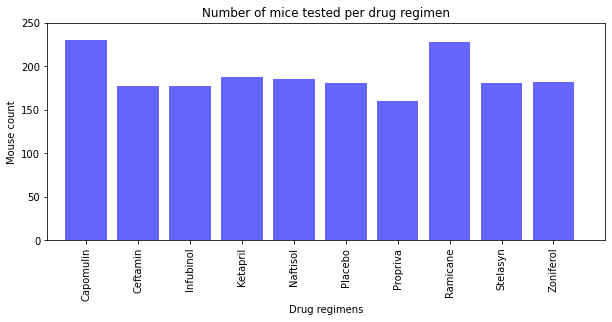

In [173]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = number_mouse.index.tolist()

mouse_count = number_mouse["Mouse ID"].tolist()

#Set x_axis and tcik locations
x_axis = np.arange(len(mouse_count))
tick_locations = [value for value in x_axis]

## Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,4))
plt.bar(x_axis, mouse_count, color="blue", alpha=0.6, align="center")
plt.xticks(tick_locations, drug_regimen, rotation="vertical")

# Set title for chart and name x and y axis
plt.title("Number of mice tested per drug regimen")
plt.xlabel("Drug regimens")
plt.ylabel("Mouse count")

# Set the limits of the x axis
plt.xlim(-0.75, 10)
# Set the limits of the y axis
plt.ylim(0, 250)

plt.show()

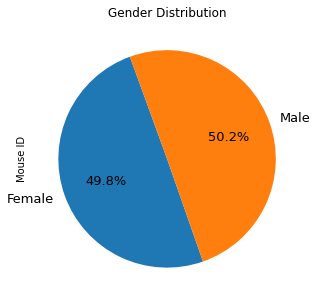

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = mouse_metadata[["Mouse ID","Sex"]].groupby("Sex")
gender_count = gender["Mouse ID"].count()

gender_count.plot(kind="pie", y='Mouse ID', title=("Gender Distribution"),legend=False,autopct='%1.1f%%', 
 startangle=110, shadow=False, fontsize=13, figsize=(8,5))
plt.show()

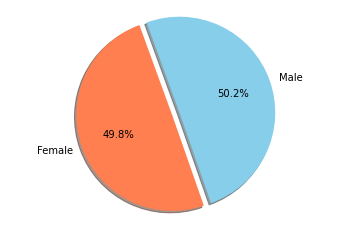

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = mouse_metadata.groupby("Sex")["Mouse ID"].count().tolist()
labels = ["Female", "Male"]
colors = ["coral", "skyblue"]
explode = (0.08, 0)
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=110)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [176]:
combined_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = combined_clean.groupby("Mouse ID")
greatest_tumor = greatest_tumor["Timepoint"].max()
greatest_tumor = greatest_tumor.reset_index()
greatest_tumor
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = greatest_tumor.merge(combined_clean, on=["Mouse ID","Timepoint"], how="left")
merge_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [178]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merge_data.loc[merge_data["Drug Regimen"]== i,  "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Find lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)   
    
    # Finding outlier and printing out drug regimen name and outlier number, if meets condition
    find_outlier = tumor_vol.loc[(tumor_vol < lower_bound)| (tumor_vol>upper_bound)]
    
    # Printing out the lower quartile, upper quartile, interquartile range, median, and lower and upper bounds for each drug regimen in the treatment list
    print(f'{i} outlier is: {find_outlier}\n'
          f'Lower Quartile:{lowerq}\n'
          f'Upper Quartile:{upperq}\n'
          f'Interquartile Range:{iqr}\n'
          f'The median of tumor volume is:{quartiles[0.5]}\n'
          f'Values below {lower_bound} could be outliers.\n'
          f'Values above {upper_bound} could be outliers.\n'
         )

Capomulin outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)
Lower Quartile:32.37735684
Upper Quartile:40.1592203
Interquartile Range:7.781863460000004
The median of tumor volume is:38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)
Lower Quartile:31.56046955
Upper Quartile:40.65900627
Interquartile Range:9.098536719999998
The median of tumor volume is:36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol outlier is: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Lower Quartile:54.04860769
Upper Quartile:65.52574285
Interquartile Range:11.477135160000003
The median of tumor volume is:60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin outlier is: Series([], Name: Tumor Volume (mm3), dtype: float6

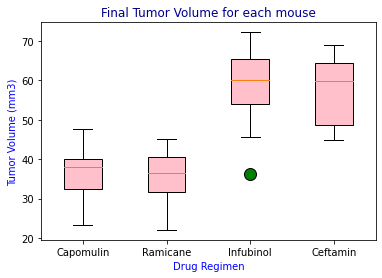

In [179]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_list, labels = treatment_list,patch_artist=True,boxprops=dict(facecolor='pink'),flierprops=dict(marker='o',markerfacecolor='green',markersize=12,linestyle='none'))
plt.title('Final Tumor Volume for each mouse',loc='center', color='darkblue')
plt.xlabel('Drug Regimen',color='blue')
plt.ylabel('Tumor Volume (mm3)', color='blue')
plt.show()

## Line and Scatter Plots

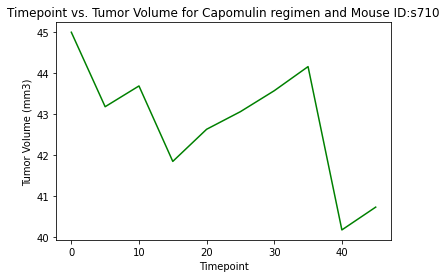

In [182]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_regimen_line = combined_clean.loc[combined_clean["Drug Regimen"]=="Capomulin"]
mouse_ids = capomulin_regimen_line["Mouse ID"].unique()
mouse_selection = [random.choice(mouse_ids)]

# Sorting the no_duplicates dataframe to only the Capomulin regimen and telling it to grab the random mouse id selection
capomulin_regimen_selection = combined_clean.loc[(combined_clean["Drug Regimen"]=="Capomulin")&(combined_clean["Mouse ID"]==random.choice(mouse_selection))]    

# Set x and y values
timepoint = capomulin_regimen_selection["Timepoint"].values
tumor_volume = capomulin_regimen_selection["Tumor Volume (mm3)"].values

# Create line plot and labels
plt.plot(timepoint, tumor_volume, color='green')
plt.title(f'Timepoint vs. Tumor Volume for Capomulin regimen and Mouse ID:{mouse_selection[0]}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

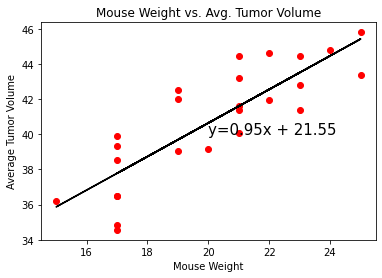

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84
The value r-squared is: 0.7088568047708717


In [185]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen_scatter = combined_clean.loc[combined_clean["Drug Regimen"]=="Capomulin"]
capomulin_regimen_average = capomulin_regimen_scatter.groupby(['Mouse ID']).mean()
weight_data = capomulin_regimen_average["Weight (g)"].values
volume_data = capomulin_regimen_average["Tumor Volume (mm3)"].values
plt.scatter(weight_data, volume_data, color='red')
plt.plot(weight_data,regress_values,"r-", color ='black')
plt.annotate(line_eq,(20,40),fontsize=15, color='black')
plt.title("Mouse Weight vs. Avg. Tumor Volume", loc='center')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen 
correlation = st.pearsonr(weight_data,volume_data)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_data, volume_data)
regress_values = weight_data * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Finding r2 value
print(f"The value r-squared is: {rvalue**2}")